In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency


df = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/hypothesis%20Testing/Costomer%2BOrderForm.csv")
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


#### **Count the occurrences of error types by center**

In [4]:
center_counts = df.apply(pd.Series.value_counts).T

#### **Plot the stacked bar plot**    

<Figure size 1600x900 with 0 Axes>

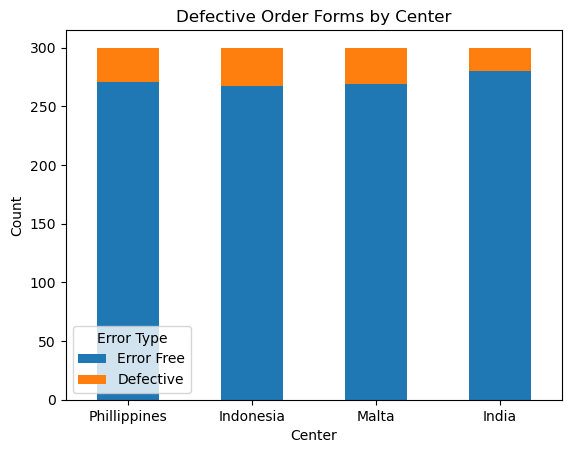

In [5]:
plt.figure(figsize=(16, 9))
center_counts.plot(kind='bar', stacked=True)
plt.xlabel('Center')
plt.ylabel('Count')
plt.title('Defective Order Forms by Center')
plt.legend(title='Error Type')
plt.xticks(rotation=0)
plt.show()

#### **Calculate the chi-squared statistic**

In [6]:
observed_values = pd.crosstab(df['Phillippines'], [df['Indonesia'], df['Malta'], df['India']])
chi2, p, dof, expected_values = chi2_contingency(observed_values)

##### **Set the significance level**

In [7]:
alpha = 0.05

#### **Print the results**

In [8]:
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected_values)

Chi-square statistic: 3.1001395592512266
P-value: 0.6845505149379718
Degrees of freedom: 5
Expected values:
[[8.70000000e-01 1.93333333e-01 2.12666667e+00 2.12666667e+00
  1.74000000e+00 2.19433333e+01]
 [8.13000000e+00 1.80666667e+00 1.98733333e+01 1.98733333e+01
  1.62600000e+01 2.05056667e+02]]


#### **Determine the conclusion**

In [9]:
if p <= alpha:
    print("There is sufficient evidence to reject the null hypothesis.")
    print("The defective percentage varies by center.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("The defective percentage does not vary significantly by center.")

There is not enough evidence to reject the null hypothesis.
The defective percentage does not vary significantly by center.
